# Auto ARIMA

## https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/

## Load Data

In [2]:
!pip install pyramid-arima

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6
from pyramid import autoarima

  Running setup.py bdist_wheel for pyramid-arima: started
  Running setup.py bdist_wheel for pyramid-arima: finished with status 'error'
  Complete output from command "c:\program files (x86)\microsoft visual studio\shared\anaconda3_64\python.exe" -u -c "import setuptools, tokenize;__file__='C:\\Users\\Family\\AppData\\Local\\Temp\\pip-install-b7tkdnpi\\pyramid-arima\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\Family\AppData\Local\Temp\pip-wheel-8aqr1kg5 --python-tag cp36:
  Partial import of pyramid during the build process.
  Requirements: ['Cython>=0.23\nnumpy>=1.10\nscipy>=0.9\nscikit-learn>=0.17\npandas>=0.19\nstatsmodels>=0.9.0\n']
  Adding extra setuptools args
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    FOUND:
      libraries = ['mkl_rt']
      librar

  Failed building wheel for pyramid-arima
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\program files (x86)\\microsoft visual studio\\shared\\anaconda3_64\\lib\\site-packages\\statsmodels\\api.py'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'pyramid'

In [2]:
data = pd.read_csv('C://Users//Family//Downloads//AirPassengers.csv')
print(data.head())
print('/n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
/n Data Types:
Month          object
#Passengers     int64
dtype: object


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('C://Users//Family//Downloads//AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print(data.head())
print('/n Data Types:')
print(data.dtypes)
data.index

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
/n Data Types:
#Passengers    int64
dtype: object


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
1949-06-01          135
1949-07-01          148
1949-08-01          148
1949-09-01          136
1949-10-01          119


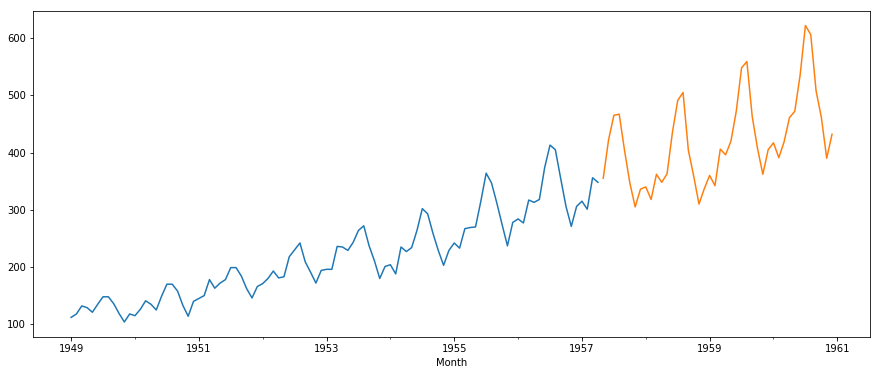

In [11]:
# Divide into Training / Validation set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

# Preprocessing (since ARIMA takes a univariate time series as input)
#train.drop('Month',axis=1,inplace=True)
#valid.drop('Month',axis=1,inplace=True)

# Plotting the series
train['#Passengers'].plot()
valid['#Passengers'].plot()


In [12]:
# Building the Model
from pyramid.arima import auto_arima
model = auto_arima(train, trace = True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index= valid.index, columns=['Prediction'])

# Plot the predictions
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

ModuleNotFoundError: No module named 'pyramid'